## Naive Bayes

**import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset**

In [2]:
data = pd.read_csv('social_network_ads.csv')
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
X = data.iloc[:,:-1].values
y= data.iloc[:,-1].values

**Splitting the dataset into train set and test set**

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=0)

**Feature Scaling**

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_= sc.fit_transform(X_train)
X_test_ =sc.transform(X_test)

**Training the Naive Bayes Model on the training set**

In [6]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_,y_train)

GaussianNB()

**Predicting a new result**

In [7]:
classifier.predict(sc.transform([[30,87000]]))

array([0], dtype=int64)

**Predicting the test set result**

In [8]:
y_pred = classifier.predict(X_test_)
table =pd.DataFrame(
    {
        'Actual Purchase': y_test,
        'Predicted Purchase' : y_pred
    }
)

table.head()

,Actual Purchase,Predicted Purchase
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


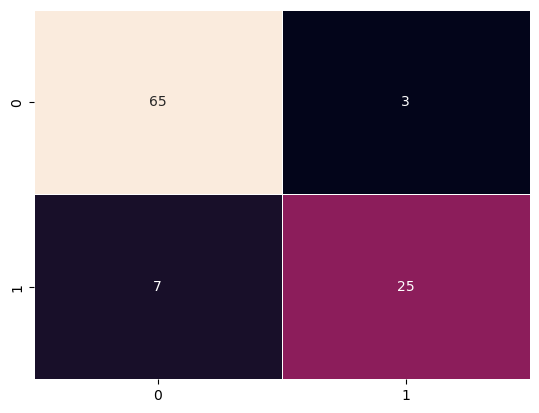

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score

conf= confusion_matrix(y_test,y_pred)
sns.heatmap(conf, annot=True,lw=.5, cbar=False);

In [10]:
accuracy_score(y_test,y_pred)

0.9

**Visualising the train set result**

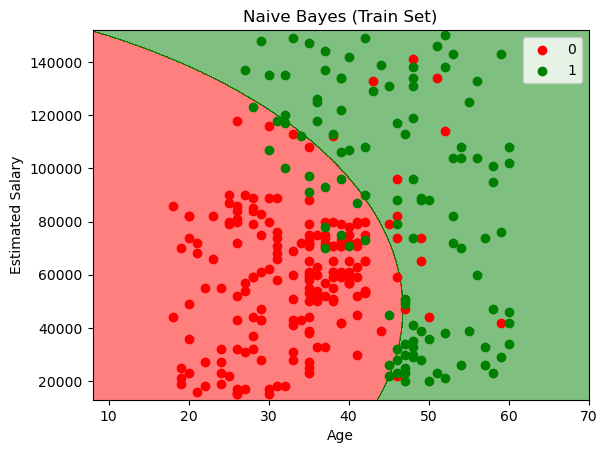

In [11]:
from matplotlib.colors import ListedColormap

X_set,y_set = X_train,y_train

X1,X2=np.meshgrid( np.linspace(X_set[:,0].min()-10,X_set[:,0].max()+10,1000), np.linspace(X_set[:,1].min()-2000,X_set[:,1].max()+2000,1000))

input = sc.transform(np.array([X1.ravel(),X2.ravel()]).T)
Z=classifier.predict(input)
plt.contourf(X1,X2,Z.reshape(X1.shape),alpha=.5,cmap=ListedColormap(('red','green')))

for i in  np.unique(y_set):
    plt.scatter(X_set[y_set==i,0],X_set[y_set==i,1],c = ['red','green'][i],label=i)

plt.title('Naive Bayes (Train Set)')
plt.ylabel('Estimated Salary')
plt.xlabel('Age')
plt.legend();








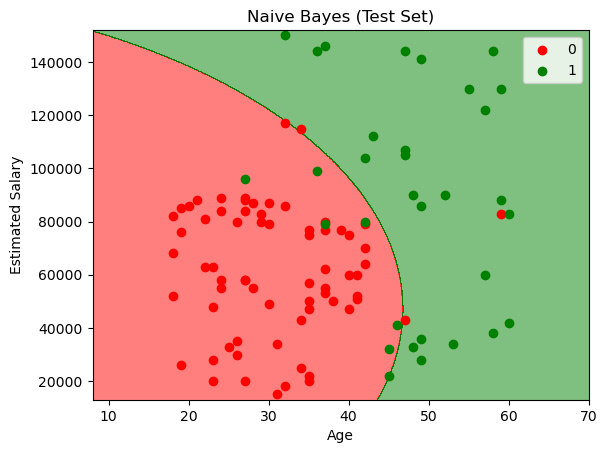

In [12]:
from matplotlib.colors import ListedColormap

X_set,y_set = X_train,y_train

X1,X2=np.meshgrid( np.linspace(X_set[:,0].min()-10,X_set[:,0].max()+10,1000), np.linspace(X_set[:,1].min()-2000,X_set[:,1].max()+2000,1000))

input = sc.transform(np.array([X1.ravel(),X2.ravel()]).T)
Z=classifier.predict(input)
plt.contourf(X1,X2,Z.reshape(X1.shape),alpha=.5,cmap=ListedColormap(('red','green')))

for i in  np.unique(y_test):
    plt.scatter(X_test[y_test==i,0],X_test[y_test==i,1],c = ['red','green'][i],label=i);

plt.title('Naive Bayes (Test Set)')
plt.ylabel('Estimated Salary')
plt.xlabel('Age')
plt.legend();




